In [1]:
# imports
import tensorflow as tf

In [7]:

# We have designed a class to stop the training when the model reaches a desired accuracy

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.998):
            print("\nReached 99.8% accuracy so cancelling training!")
            self.model.stop_training = True
                
callbacks = myCallback()

In [8]:
# Load the mnist dataset
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [9]:
# First we will reshape the images and adjust the values to have a faster model
# That's because the first convolution expects a single tensor containing everything, 
# so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, 
# and the same for the test images. 
# If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape. 

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [10]:
# Model with 3 convilutional layers, each followed by a maxpooling layer.
# The model is then followed by the previous neural network

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()    # To see the steps
model.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [24]:
classifications = model.predict(test_images)

print(classifications[88]*100)
print(test_labels[88])

[4.1704016e-14 9.8957423e-17 2.2879029e-15 3.4909367e-16 6.0699364e-14
 2.5729095e-14 1.0000000e+02 6.9606279e-20 8.0361499e-13 3.5240799e-23]
6


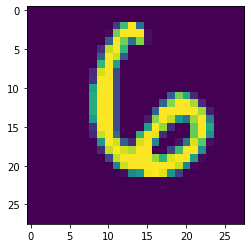

In [22]:
import matplotlib.pyplot as plt
plt.imshow(test_images[88])